# Numpy

In [ ]:
%pip install -q ipywidgets ipympl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## Docs
https://numpy.org/doc/stable/reference/routines.html

Numpy is the defacto numerical library for python. If you're doing scientific computing then you are likely using numpy. It is a powerful library that allows you to do a lot of things with arrays and matrices and is the backbone of many other libraries like pandas and scikit-learn.

First things first, if you are using numpy like this:

In [2]:
def bad_way(a, b):
    x = np.zeros(len(a))
    
    for i in range(len(a)):
        x[i] = 1.324 * a[i] - 12.99 * b[i] + 1
    
    return x

This is **BAD**, it does not take advantage of numpys greatest advantage. **Vectorization**

In [3]:
def numpy_way(a, b):
    return 1.324 * a - 12.99 * b + 1

In [4]:
a = np.arange(1e6)
b = np.arange(1e6)

We can see they are the same:

In [5]:
np.all(numpy_way(a,b) == bad_way(a,b))

True

### But one is much faster:

In [6]:
%timeit bad_way(a, b)

566 ms ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit numpy_way(a, b)

1.98 ms ± 69.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


A preview into optimizations:

In [8]:
a = np.random.rand(100,10,10,10,10)
b = np.random.rand(10,10,10,10,100)

In [9]:
%timeit a[0,:,:,:,:] + 1

6.77 μs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%timeit a[:,:,:,:,0] + 1

342 μs ± 15 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We will discuss this tomorrow!

One of the great things about numpy is that you can do standard operations on arrays and it will apply the operation to each element in the array. These are *elementwise* operations. You can treat it in most cases like any other variable. Lets take a function:

In [11]:
def line_equation(m, x, c):
    return m * x + c

This function can work with both scalars and arrays.

In [12]:
scal_x = 1.324
arr_x = np.array([1.324,4,67,4,6,534,5,3])

print(f'Scalar version {line_equation(2.5, scal_x, 1)}')
print(f'Array version {line_equation(2.5, arr_x, 1)}')


Scalar version 4.3100000000000005
Array version [   4.31   11.    168.5    11.     16.   1336.     13.5     8.5 ]


## Creating arrays

Creating arrays can be done using a python list or a tuple.

In [13]:
a = np.array([10,20,30,40,50,60])
a

array([10, 20, 30, 40, 50, 60])

In this case since they are whole values, numpy will infer the type of the array as an integer.

In [14]:
a.dtype

dtype('int64')

You can force a particular type by using the dtype argument.

In [15]:
a = np.array([10,20,30,40,50,60], dtype=np.float64)

This argument exists in most functions in numpy. 99% the time you can stick with numpys default type inference. But some cases may necessitate a specific type (e.g. when reading/writing to disk).

### Array properties

Arrays carry metadata that describe the array. This includes the shape, the number of dimensions, the size of the array, and the type of the array.

In [17]:
print(a.shape)
print(a.ndim)
print(a.nbytes)
print(a.dtype)

(6,)
1
48
float64


You can use this to infer how your calculations are going to work.

In [18]:
def my_calculation(x):
    if x.ndim == 1:
        return x*2
    if x.ndim == 2:
        return x*10
    else:
        return x*100
    
print(my_calculation(np.array([1,2,3])))

print(my_calculation(np.array([[1,2,3],[4,5,6]])))

[2 4 6]
[[10 20 30]
 [40 50 60]]


### Zeros

We can create zeros easily with the zeros function. This is useful when you want to create an array of zeros of a particular shape.

In [19]:
a = np.zeros(10)
b = np.zeros(shape=(20, 10))

print(a)
print('-----')
print(b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-----
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Ones

One is the same as zeros but with ones.

In [20]:
a = np.ones(10)
b = np.ones(shape=(5,2))

a,b

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]))

### Full

You can create an array of a particular shape with a particular value. Like ones or zeros.

In [21]:
np.full(8, 12.3)

array([12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3])

### Empty

Empty is the fastest way to create an array and there is no fill operation. It will create an array of the shape you specify but the values will be whatever is in memory at the time. This is useful when you know you are going to fill the array with values later. You can see this behaviour by running the zeros cells and then the empty one.

Use empty if you are guarenteed to fill the whole array with values later. Do not use it if you are going to fill it partially and instead opt for either zeros or ones.

In [22]:
a = np.empty(15)
b = np.empty(shape=(5,2))

a,b

(array([ 0.00000000e+000,  5.18768928e-322, -0.00000000e+000,
         0.00000000e+000,  5.45352918e-312,  1.26480805e-321,
         0.00000000e+000,  0.00000000e+000,  1.77229088e-310,
         3.50977866e+064,  0.00000000e+000,  0.00000000e+000,
                     nan,              nan,  3.50977942e+064]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]))

In [23]:
%timeit np.zeros(100_000)

19.3 μs ± 2.74 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [24]:
%timeit np.empty(100_000)

880 ns ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [25]:
c = np.zeros_like(b)
np.ones_like(c)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

### Random Data

You can generate random data using the randn function.

In [26]:
x = np.random.randn(10,10)
x

array([[ 0.55398939, -1.34572318, -0.73727126,  1.08361402, -0.64052223,
         0.36301673, -0.05990778,  1.53563835, -0.60784661, -0.99836981],
       [ 0.23985214, -0.45105947,  2.36378939,  2.39565813,  0.87529909,
        -1.74885978, -0.80796935,  0.06634193, -0.13756634,  0.6988798 ],
       [-0.66334413, -1.26705208, -0.72791062,  0.64796008, -0.20783233,
         0.86330755,  0.03833921, -1.55829678,  2.68069614,  1.18969625],
       [-1.41390189, -0.79789381,  1.36514677, -0.54224085, -0.22173767,
         0.32347476, -0.5340191 , -0.52156578, -1.3424745 ,  0.69450009],
       [-0.39284671,  1.09773438,  1.81010669,  0.73432248, -0.72955625,
         0.78546543, -0.37541842, -2.03309635,  1.16557937,  1.05967507],
       [ 1.25834012,  1.4571575 , -0.72704817, -0.15280491,  0.71307209,
         0.1610266 ,  2.17526549, -0.01979657,  0.15412314, -2.01511848],
       [ 0.16943754,  0.70609396,  0.25447048, -0.72156067, -0.02905271,
        -0.47466754, -1.15605367,  0.27733202

However this is a pretty old method and the new method requires building a state.

In [34]:
rng_state = np.random.default_rng()

rng_state.random(size=(5,5))

array([[0.03691735, 0.30088872, 0.11393062, 0.80912756, 0.22825289],
       [0.5253578 , 0.14308824, 0.43493935, 0.33175639, 0.65017568],
       [0.3882266 , 0.41526056, 0.87520351, 0.54706285, 0.25075504],
       [0.65663104, 0.7814144 , 0.81828227, 0.3272282 , 0.9821813 ],
       [0.7770244 , 0.19994699, 0.40903953, 0.86575388, 0.41728157]])

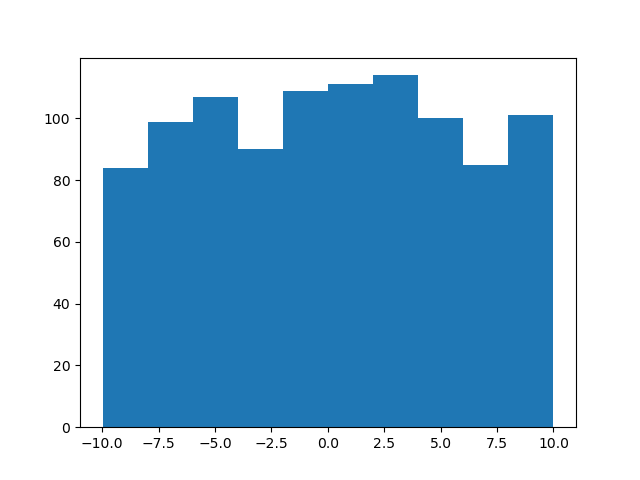

In [32]:
uniform = rng_state.uniform(-10,10,size=(1000,))
plt.figure()
plt.hist(uniform,bins=10)
plt.show()

In [42]:
rng_normal = rng_state.normal(size=1_000_000)

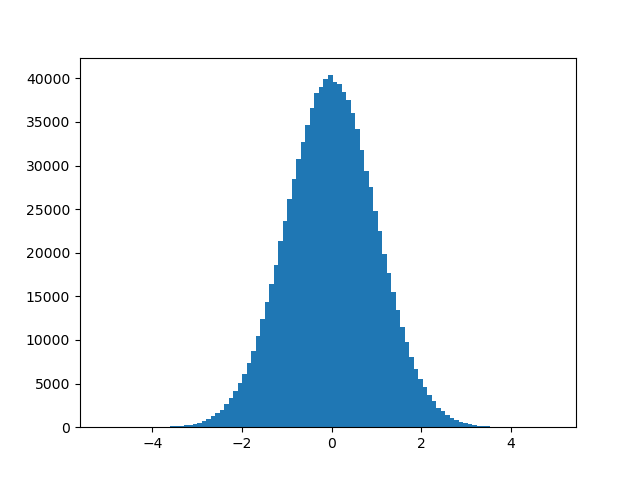

In [43]:
plt.figure()
plt.hist(rng_normal,bins=100)
plt.show()

### Create array between start and end with a sampling value

In [45]:
a = np.arange(0, 10, 2) # start, end, sampling
a

array([0, 2, 4, 6, 8])

### Create array between start and end with a number of points

In [46]:
a = np.linspace(0,10, 4) # start, end, number of points. 10 inclusive
a

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

In [47]:
b = np.linspace(0, 10, 4, endpoint=False) # exclusive of 10
b

array([0. , 2.5, 5. , 7.5])

In [48]:
c = np.logspace(-4, 4, 10)
c

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

### Create a ND mesh using 1D arrays

In [49]:
x = np.linspace(-10, 10, 20)
y = np.linspace(-20, 20, 50)

X, Y = np.meshgrid(x,y)

print(X.shape)
print(Y.shape)




(50, 20)
(50, 20)


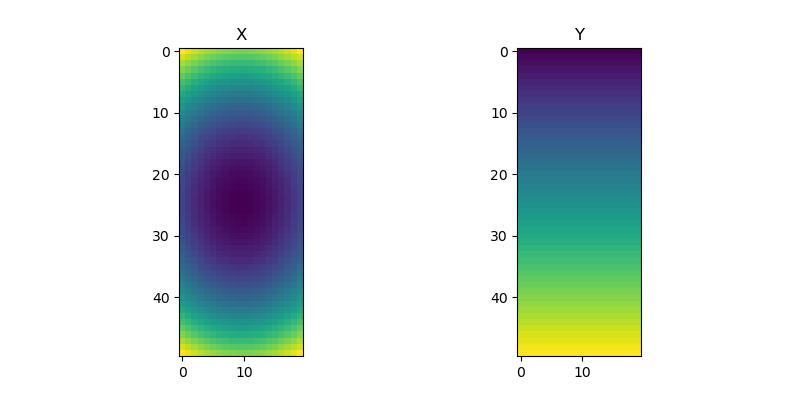

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.set_title('X')
ax1.imshow(X**2 + Y**2)
ax2.set_title('Y')
ax2.imshow(Y)

# 

### Access tricks

Numpy has standard access with 0, 1, 2 but you can also access it **backwards** by using negative indices. For example `-1` will access the last element, `-2` the one before last etc.

In [56]:
x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
x[0]

0

In [58]:
x[1]

1

In [59]:
x[-1]

9

In [60]:
x[-2]

8

In [61]:
x[-10]

0

## Slicing

### Slicing is one of numpys best features, you can manipulate arrays in interesting ways. 

Slicing is achieved using the `::` operator where the arguments are:
    
    [start index]:[end index]:skip
    
You can supply all, some, or none of the arguments

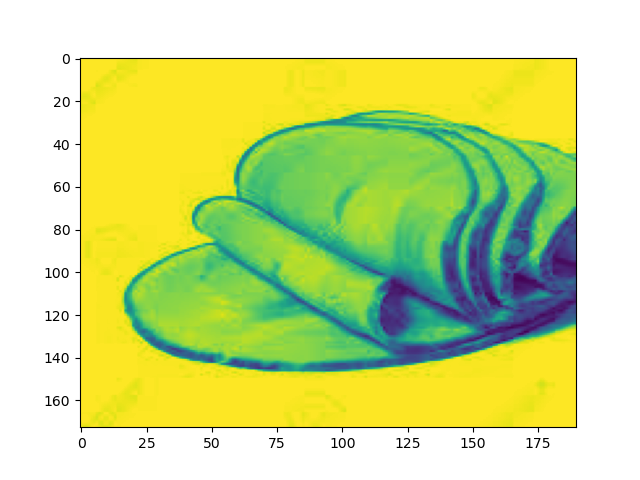

In [68]:
# Load in some important data
data = np.loadtxt('../data/important.txt')
plt.figure()
plt.imshow(data[10:200:,10:200:],aspect='auto')
plt.show()

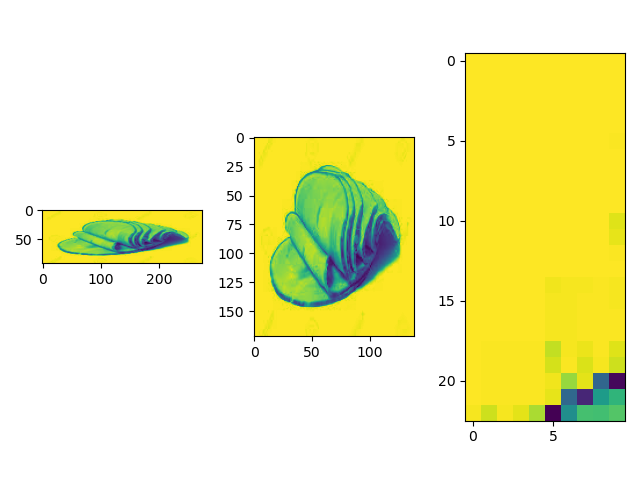

In [69]:
figs, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(data[::2])
ax2.imshow(data[10:-1,::2])
ax3.imshow(data[4:50:2, 70:90:2])
figs.tight_layout()
plt.show()

If we wanted a slice but only cared about the last axes we might end up doing this:

In [70]:
def bad_many_slices_of_ham(array):
    if array.ndim == 2:
        return array[::2,::2]
    elif array.ndim == 3:
        return array[:, ::2, ::2]
    elif array.ndim == 4:
        return array[:, :, ::2, ::2]
    raise NotImplementedError
    

In [71]:
bad_many_slices_of_ham(data.reshape(1,*data.shape))

array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 254., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]])

In [72]:
bad_many_slices_of_ham(data.reshape(1, 1,*data.shape))

array([[[[255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         ...,
         [255., 255., 255., ..., 254., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.]]]])

In [73]:
bad_many_slices_of_ham(data.reshape(1,1, 1,*data.shape))

NotImplementedError: 

What we can do instead is exploit the ellipsis operator (...):

In [74]:
def good_many_slices_of_ham(array):
    return array[..., ::2, ::2]

In [75]:
good_many_slices_of_ham(data)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 254., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [76]:
good_many_slices_of_ham(data.reshape(1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,*data.shape))

array([[[[[[[[[[[[[[[[[[[[255., 255., 255., ..., 255.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.],
                         ...,
                         [255., 255., 255., ..., 254.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.],
                         [255., 255., 255., ..., 255.,
                          255., 255.]]]]]]]]]]]]]]]]]]]])

In [77]:
big_shape = data.reshape(1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,*data.shape)

In [78]:
big_shape[::2, :, :, :, ..., ::4 ].shape

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 183, 69)

## Filtering using boolean masks

If you perform a comparison of some kind (`==`, `<`, `>` etc). Numpy will generate a boolean array

In [79]:
array = np.array([10,20,30,40,50,60,70,80,90,100])

In [80]:
array < 50

array([ True,  True,  True,  True, False, False, False, False, False,
       False])

In [81]:
np.where(array < 50)

(array([0, 1, 2, 3]),)

In [82]:
mybool = np.array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, True, False, False, False, False,
       False], dtype=bool)

In [86]:
mybool = array < 50

In [87]:
array[mybool]

array([10, 20, 30, 40])

In [89]:
array[ array < 50 ] = 0
array

array([  0,   0,   0,   0,  50,  60,  70,  80,  90, 100])

### Exercise circular aperture

Given `x` and `y` coordinates and a `radius` create a `create_circle` function that produces an array of zeros with a circle of 1s
For example a function that works like this:

```python
    x = np.linspace(-10, 10, 5)
    y = np.linspace(-10, 10, 5)
    R = 5
    circle = create_circle(x, y, 5)
```
Would return an `circle` array like this:
```python
    [[0 0 0 0 0]
     [0 0 1 0 0]
     [0 1 1 1 0]
     [0 0 1 0 0]
     [0 0 0 0 0]]
```
Remember:
$$ 
R = \sqrt{x^2 + y^2} 
$$



In [92]:
def create_circle(x, y, radius):

    X, Y = np.meshgrid(x,y)
    bool_mask = np.sqrt(X**2 + Y**2) < radius
    circle = np.zeros_like(X)
    circle[bool_mask] = 1
    return circle

In [102]:
X, Y = np.meshgrid(x,y)
X**2 + Y**2

array([[200.        , 192.00333195, 184.33985839, ..., 184.33985839,
        192.00333195, 200.        ],
       [192.00333195, 184.00666389, 176.34319034, ..., 176.34319034,
        184.00666389, 192.00333195],
       [184.33985839, 176.34319034, 168.67971678, ..., 168.67971678,
        176.34319034, 184.33985839],
       ...,
       [184.33985839, 176.34319034, 168.67971678, ..., 168.67971678,
        176.34319034, 184.33985839],
       [192.00333195, 184.00666389, 176.34319034, ..., 176.34319034,
        184.00666389, 192.00333195],
       [200.        , 192.00333195, 184.33985839, ..., 184.33985839,
        192.00333195, 200.        ]])

In [97]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
R = 5
circle = create_circle(x, y, 5)

print(circle)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


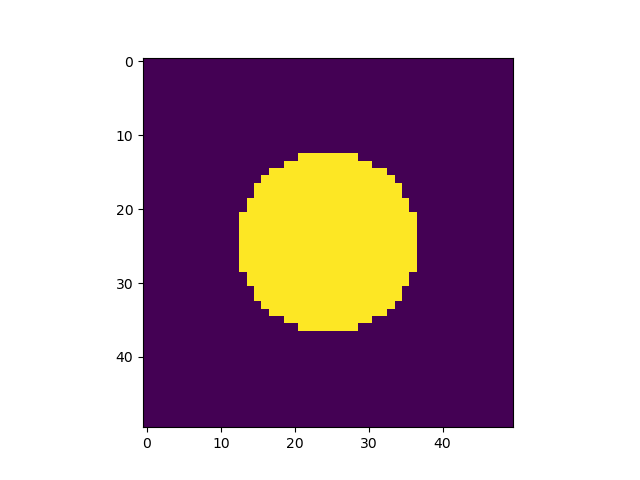

In [98]:
plt.figure()
plt.imshow(circle)
plt.show()

Now make an interact plot of it with an adjustable radius (You can refer to yesterdays notebook on this!)
You can use `plt` interface or if you're feeling fancy try `fig, ax` interface

interactive(children=(IntSlider(value=15, description='radius', max=30), Output()), _dom_classes=('widget-inte…

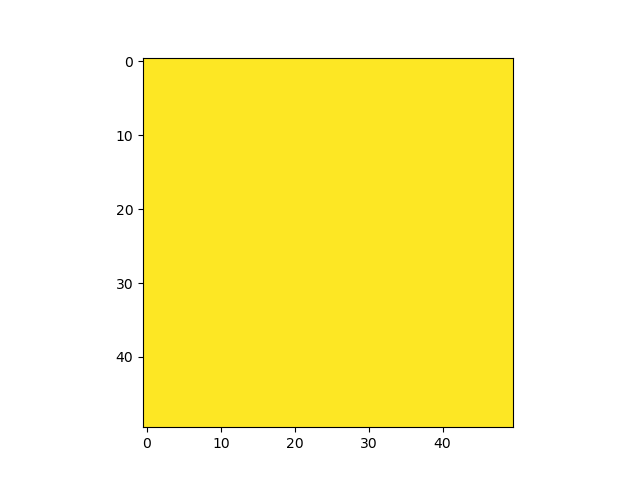

In [110]:
# Interactive plot here
from ipywidgets import interact

fig = plt.figure()
im = plt.imshow(circle)

@interact(radius=(0,30))
def update_circle(radius):
    circle = create_circle(x,y, radius)
    im.set_data(circle)

In [112]:
plt.close(fig)

In [114]:
fig.savefig('test.pdf')

### AND (&)

In [115]:
print(True & True)
print(True & False)
print(False & False)

array[ (array <50) & (array > 20)]


True
False
False


array([], dtype=int64)

### OR (|)

In [116]:
print(True | True)
print(True | False)
print(False | False)

array[ (array <50) | (array > 350) ]

True
True
False


array([0, 0, 0, 0])

### Exclusive OR (^)

In [117]:
print(True ^ True)
print(True ^ False)
print(False ^ False)

array[  (array < 50) ^ (array < 70)]

False
True
False


array([50, 60])

### NOT (~)

In [118]:
print(not True)
print(not False)

False
True


In numpy not is represented by the (~) operator and is used like this:

In [ ]:
array[~(array >= 50)]

### Exercise build a square aperture

Like the circle aperture, using filtering given, `x`, `y`, `width` and `height` produce rectanglar aperture:

    >>> x = np.linspace(-10, 10, 5)
    >>> y = np.linspace(-10, 10, 5)
    >>> width = 5
    >>> height = 10
    >>> rect = create_rectangle(x, y, width, height)

Would return an `rectangle` array like this:
    
    [0 1 1 1 0]
    [0 1 1 1 0]
    [0 1 1 1 0]
    [0 1 1 1 0]
    [0 1 1 1 0]


Hint: You can use `np.abs` to take the absolute value

In [ ]:
def create_rectangle(x, y, width, height):
    pass

In [ ]:
plt.figure()
plt.imshow(create_rectangle(x, y, 5, 5))
plt.show()

In [ ]:
from ipywidgets.widgets import interact

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# ...Do the plotting here


## Broadcasting

Lets look at a common problem. We have a matrix `A` and a vector `x` and we want to apply `x` along the matrix. For example:
    
    A:
      [1,1,1,1]
      [1,1,1,1]
      [1,1,1,1]
    x:
      [1, 2, 3]
    
    result:
      [1,1,1,1]
      [2,2,2,2]
      [3,3,3,3]
How would we go about doing it?

In [119]:
A = np.ones(shape=(3,4))
x = np.arange(1,4)
A,x

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([1, 2, 3]))

In [120]:
A*x

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

We can insert a fake axis into `x` to make its shape "compatible" with `A`

In [121]:
A*x[:, None]

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

In [123]:
x[:,None].shape

(3, 1)

Broadcasting allows you make arrays dimensionally compatible by inserting "fake" axis. Numpy determines compatible dimensions through two rules:

- they are equal, or
- one of them is 1

We can exploit this behavoir and build higher dimensional array operations using lower dimensional ones. For example, with just `x` and simulate an outer product

$\rvert x\rangle \langle x \rvert$

In [124]:
x[:,None]*x[None,:]

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [125]:
x[:,None] - x[None,:]

array([[ 0, -1, -2],
       [ 1,  0, -1],
       [ 2,  1,  0]])

### Exercise Weins Law version II

Previously our Weins law function looked like this:

In [126]:
def weins_law(wavelength, 
              temperature):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength ** 5
    
    return I0 * np.exp(-( h * c ) / ( wavelength * kB * temperature))

Now if we tried to pass in a temperature array and wavelength array what should the shape be?

In [127]:
temperature = np.linspace(10,1000,100)
wavelength = np.linspace(0.1,100,100)

out = weins_law(wavelength, temperature)

In [128]:
out.shape

(100,)

Is this correct? What about if they're different shapes?


In [129]:
temperature = np.linspace(10,1000,10)
wavelength = np.linspace(0.1,100,100)
out = weins_law(wavelength, temperature)

ValueError: operands could not be broadcast together with shapes (100,) (10,) 

It doesn't, since for Weins law we expect:

- For *each* temperature we want all wavelengths
- The shape of the output array should be something like (Num T, Num wavelength)

Use broadcasting and fix our weins law function:

In [131]:
def weins_law_II(wavelength, 
              temperature):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength[None,:] ** 5
    
    return I0 * np.exp(-( h * c ) / ( wavelength[None,:] * kB * temperature[:,None]))

# (t, w)


temperature = np.linspace(10,1000,100)
wavelength = np.linspace(0.1,100,100)

out = weins_law_II(wavelength, temperature)

assert out.shape == (100,100)

temperature = np.linspace(10,1000,10)
wavelength = np.linspace(0.1,100,100)

out = weins_law_II(wavelength, temperature)

assert out.shape == (10,100)

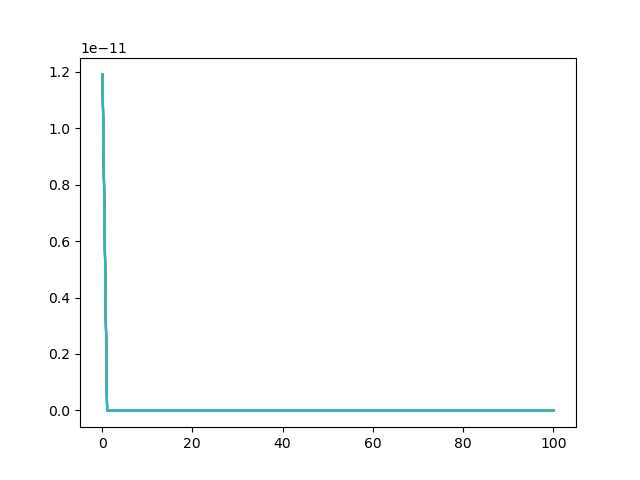

In [134]:
plt.figure()
plt.plot(wavelength,out.T)
plt.show()

## Linear Algebra

In [135]:
A = np.arange(0, 100).reshape(10, 10)
v1 = np.arange(0, 10)

In [136]:
v1.shape

(10,)

In [149]:
A.dot(v1)

array([ 285,  735, 1185, 1635, 2085, 2535, 2985, 3435, 3885, 4335])

### Matrix matrix

In [137]:
np.dot(A,A)

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

In [138]:
A @ A

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

### Matrix Vector

In [139]:
np.dot(A, v1)

array([ 285,  735, 1185, 1635, 2085, 2535, 2985, 3435, 3885, 4335])

In [140]:
A @ v1

array([ 285,  735, 1185, 1635, 2085, 2535, 2985, 3435, 3885, 4335])

### Dot product

In [141]:
np.dot(v1, v1)

285

In [142]:
v1 @ v1

285

In [143]:
np.einsum('ij,jk -> i', A, A)

array([ 30525,  80025, 129525, 179025, 228525, 278025, 327525, 377025,
       426525, 476025])

### Transpose

In [146]:
np.random.rand(2,10).T.shape

(10, 2)

### Complex

In [150]:
A_complex = A*1j
A_complex.dtype

dtype('complex128')

In [151]:
v2 = np.array([5 + 1j, 4 + 4j])
print(v2.dtype)
v2

complex128


array([5.+1.j, 4.+4.j])

In [152]:
v2.conjugate()

array([5.-1.j, 4.-4.j])

In [153]:
v2*v2.conjugate()

array([26.+0.j, 32.+0.j])

In [154]:
v2.imag

array([1., 4.])

In [155]:
print(v2.real)
v2.real[:] *= 2
print(v2.imag)
v2.imag[:] /= 2

v2


[5. 4.]
[1. 4.]


array([10.+0.5j,  8.+2.j ])

In [156]:
np.abs(v1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [157]:
np.sqrt(v2.real**2 + v2.imag**2)

array([10.0124922 ,  8.24621125])

### Matrix inverse

In [158]:

A = np.random.rand(10,10)

np.linalg.inv(A)

array([[  0.82577755,  -4.55330511,   6.5425769 ,  -2.70678796,
         -0.50511858,   0.55544639,   2.84659926,  -1.57363145,
          0.8007697 ,  -4.67987031],
       [  3.14607143,  -8.19964579,  11.30522593,  -5.63324692,
         -2.8976599 ,   0.74235547,   4.4054392 ,  -0.35573732,
          1.74343966,  -8.42427352],
       [ -1.39459087,   6.00383687,  -8.85686042,   3.40169381,
          2.57845034,  -0.95840951,  -2.84042957,   1.49026921,
         -1.08039077,   4.65816557],
       [ -2.21086599,   9.43363638, -12.81701018,   5.57413893,
          2.63951489,  -2.26672512,  -4.26754451,   1.85508989,
         -1.17869042,   8.0308914 ],
       [ -1.56573417,   0.59653123,  -0.92768113,   0.07263351,
          0.08669323,   0.34158746,  -0.33373556,   0.10710715,
          0.22248122,   2.07087404],
       [  2.15890534,  -5.69816458,   9.44514937,  -3.91094929,
         -2.51047199,   0.62302556,   1.80364928,  -0.86875406,
          1.95563719,  -5.77074597],
       [ -

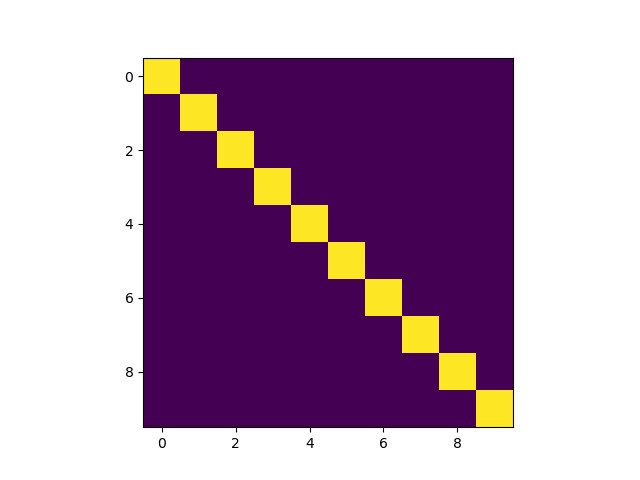

In [159]:
plt.figure()
plt.imshow(A @ np.linalg.inv(A))
plt.show()

### Matrix determinant

In [160]:
np.linalg.det(A)

0.007017001807489693

### Matrix eignvalues

In [161]:
eignval, eignvec = np.linalg.eig(A)

In [162]:
np.isclose(A @ eignvec, eignval*eignvec)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

## Operations

### Reductions

In [166]:
A = np.random.rand(100,10)

In [168]:
np.sum(A)
A.sum()

494.1569154879902

In [169]:
A.shape

(100, 10)

In [172]:
A.sum(axis=0).shape

(10,)

In [173]:
A.sum(axis=1).shape

(100,)

In [174]:
B = np.random.rand(4,10)

B.sum(axis=1).shape

(4,)

Most reductions have a keepdims argument that will keep the dimensions of the array the same. This is useful when you want to keep the shape of the array the same.

In [175]:
vector = np.random.rand(10,100)
print('No keep dims:', vector.sum(axis=0).shape)
print('Keep dims:', vector.sum(axis=0, keepdims=True).shape)

No keep dims: (100,)
Keep dims: (1, 100)


This is useful for things like normalizing an array along an axis:

In [176]:
normed_vector = vector / vector.sum(axis=0, keepdims=True)

In [177]:
np.mean(A), A.mean(), A.mean(axis=0)

(0.4941569154879902,
 0.4941569154879902,
 array([0.51029237, 0.51338834, 0.50512321, 0.50462322, 0.46414767,
        0.47195871, 0.50714387, 0.49504702, 0.46707525, 0.50276949]))

In [178]:
np.prod(v1 + 1)

3628800

In [179]:
np.cumsum(v1)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [180]:
np.cumprod(v1 + 1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [181]:
np.trace(A)

2.591465948424826

In [184]:
np.diagonal(A).sum()

2.591465948424826

## Fourier Transform

Numpy provides the `fft` module which allows you to perform fourier transforms

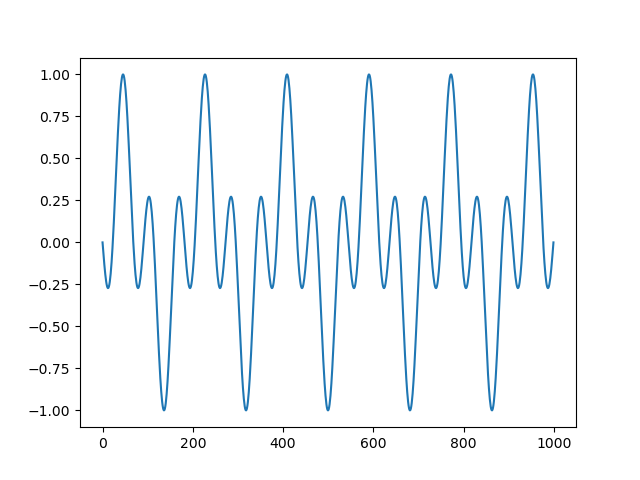

In [185]:
x = np.linspace(-np.pi, 10*np.pi, 1000)
plt.figure()
plt.plot(np.sin(x)*np.cos(2*x))
plt.show()

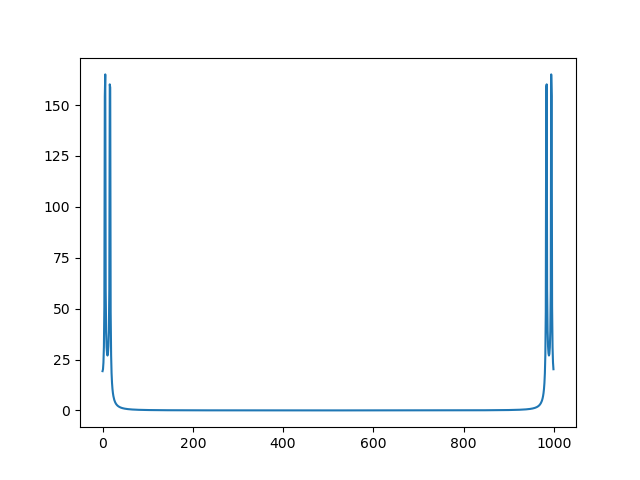

In [186]:
out = np.fft.fft(np.sin(x)*np.cos(2*x))
plt.figure()
plt.plot(np.abs(out))
plt.show()

The output of the FFT can be a little strange, the first half are for frequencies between `0` and `N/2` and the second half is between `-N/2` and `0`, we can shift the zero to the centre using `fftshift`

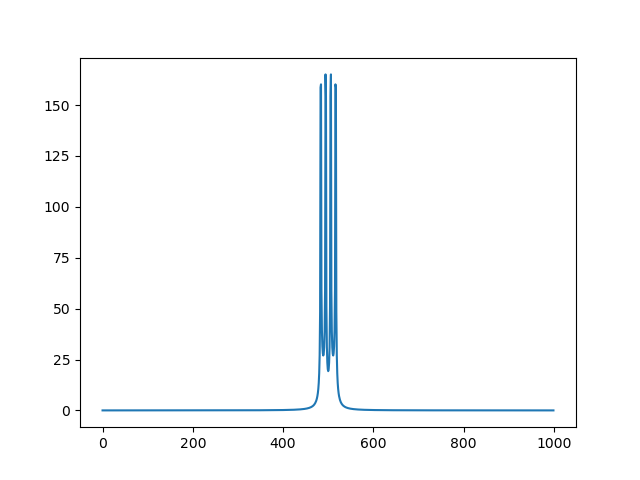

In [187]:
out = np.fft.fft(np.sin(x)*np.cos(2*x))
plt.figure()
plt.plot(np.absolute(np.fft.fftshift(out)))
plt.show()

We can also get the frequency coordinates using `fftfreq` (Remember to shift it as well!)

In [ ]:
np.fft.fftfreq?

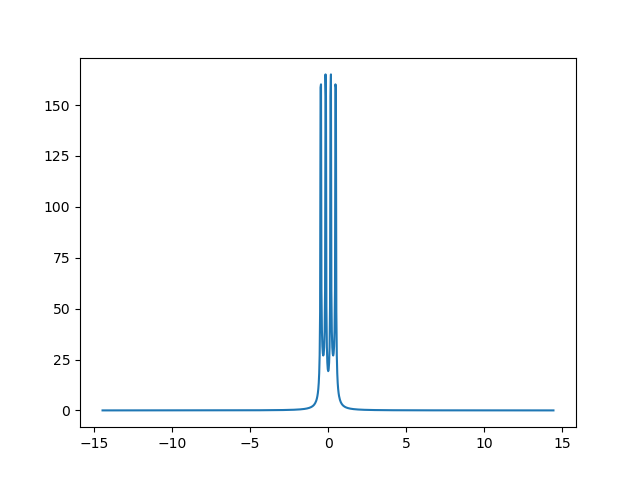

In [188]:
fx=np.fft.fftfreq(x.shape[0],d=x[1]-x[0])

fx = np.fft.fftshift(fx)
out = np.fft.fft(np.sin(x)*np.cos(2*x))

plt.figure()
plt.plot(fx, np.absolute(np.fft.fftshift(out)))
plt.show()

We can even do 2D FFTs. Lets try with our circle aperture function

interactive(children=(FloatSlider(value=4.0, description='r', max=10.0), Output()), _dom_classes=('widget-inte…

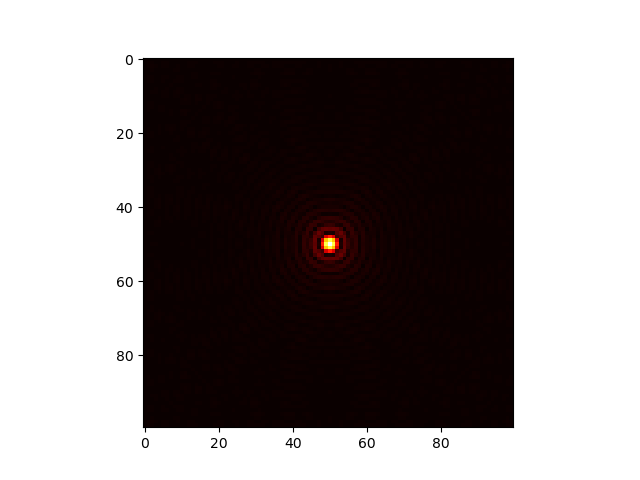

In [189]:
import matplotlib as mpl
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
r = 4.0

circle = create_circle(x, y, r)

fft_circle = np.fft.fftshift(np.fft.fft2(circle))

plt.figure()
im = plt.imshow(np.absolute(fft_circle), cmap='hot')

@interact(r=(0, 10,0.1))
def update(r=4):
    circle = create_circle(x, y, r)
    fft_circle = np.fft.fftshift(np.fft.fft2(circle))
    im.set_data(np.abs(fft_circle))
    


In [ ]:
import matplotlib as mpl
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
w = 2.0
h = 2.0

rectangle = create_rectangle(x, y, w, h)

fft_rect = np.fft.fftshift(np.fft.fft2(rectangle))

plt.figure()
im = plt.imshow(np.absolute(fft_rect), cmap='hot')

@interact(w=(0, 10,0.1), height=(0, 10, 0.1))
def update(w=2, h=2):
    rectangle = create_rectangle(x, y, w, h)
    fft_rect = np.fft.fftshift(np.fft.fft2(rectangle))
    im.set_data(np.abs(fft_rect))